## A. Predictors of Antler Size in 4.5- and 5.5-year-old Male White-tailed Deer

## I. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

## 2. Data

These two datasets include data collected from 4.5- and 5.5-year-old male white-tailed deer from a captive colony at the Kerr Wildlife Management Area.  Each dataset includes parentage information, age, birth year, diet type, antler mass, and body mass of male white-tailed deer.

## 3. Goal: assess the influence from birth weight 'birth wt', mother 'DID', father 'SID', dietary intake 'Energy' where 'S'= 2.65 kcal/g; 'L'= 1.77 kcal/g), birth year 'birthyr', mother's age at birth 'DaB', litter type 'Lit type', and year data was collected 'yr' on antler size of 4.5- and 5.5-year-old males. 

In [2]:
data_4 = pd.read_csv("Kerr_Data_4.5.csv")

data_4_ALL = pd.read_csv("Kerr_Data_4.5.csv")

data_5 = pd.read_csv("Kerr_Data_5.5.csv")

data_5_ALL = pd.read_csv("Kerr_Data_5.5.csv")


## 4. Data Cleaning

Variables 'Birthyrcat', 'Age', and 'ID' will be dropped from all datasets. 'Age' will be dropped because we already know that older deer have larger antlers. DaB and Lit Type will be dropped in 2 of the 4 datasets analyzed since they have some NA values and we will have more data in the other two datasets by doing so. Thus, four datasets were analyzed separately.

In [3]:
data_4.drop(['age','Birthyrcat','ID','DaB','Lit type'],axis=1, inplace=True)

In [4]:
data_4_ALL.drop(['age','Birthyrcat','ID'],axis=1, inplace=True)

In [5]:
data_5.drop(['age','Birthyrcat','ID','DaB','Lit type'],axis=1, inplace=True)

In [6]:
data_5_ALL.drop(['age','Birthyrcat','ID'],axis=1, inplace=True)

In [7]:
data_4_ALL.dropna()

,SID,DID,birth wt,Birthyr,Energy,yr,antler kg,bm kg,DaB,Lit type
0,1210039,2209018,2.839488,2012,L,2016,0.9540,65.317248,3.0,M
1,1210039,2209018,2.440327,2012,S,2016,1.5180,76.203456,3.0,M
2,1210045,2209059,2.775985,2012,L,2016,1.4880,71.667536,3.0,M
3,1209020,2210086,3.646883,2012,L,2016,1.2000,74.389088,2.0,S
4,1209020,2207013,2.648979,2012,S,2016,1.4880,89.811216,5.0,M
...,...,...,...,...,...,...,...,...,...,...
67,1210045,2210066,2.857632,2014,L,2018,1.6553,63.502880,4.0,M
68,1210089,2211029,1.850657,2014,L,2018,0.7410,59.647348,3.0,S
69,1210015,2209015,2.331465,2014,L,2018,1.0840,74.615884,5.0,M
70,1210045,2210082,2.694339,2014,L,2018,1.5349,86.862868,3.0,M


In [8]:
data_5_ALL.dropna()

,SID,DID,birth wt,Birthyr,Energy,yr,antler kg,bm kg,DaB,Lit type
0,1210039,2209018,2.839488,2012,L,2017,1.3412,71.894332,3.0,M
1,1210039,2209018,2.440327,2012,S,2017,1.7936,79.378600,3.0,M
2,1209020,2210086,3.646883,2012,L,2017,1.4977,80.739376,2.0,S
3,1209020,2207013,2.648979,2012,S,2017,1.8054,87.996848,5.0,M
4,1210097,2207005,2.240746,2012,L,2017,1.6849,77.564232,5.0,M
5,1210097,2209047,3.456374,2012,L,2017,0.9595,83.007336,3.0,M
6,1209029,2208036,2.186315,2012,S,2017,2.2405,81.419764,4.0,M
7,1210045,2207029,1.678292,2012,S,2017,1.4923,89.357624,5.0,M
8,1210097,2209016,2.821345,2012,L,2017,1.2497,75.296272,3.0,M
9,1209029,2210010,2.131884,2012,S,2017,1.3397,67.585208,2.0,M


In [9]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

le = LabelEncoder()
data_4['Energy'] = le.fit_transform(data_4['Energy'])
data_4['antler kg'] = le.fit_transform(data_4['antler kg'])
data_4['bm kg'] = le.fit_transform(data_4['bm kg'])

In [10]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

le = LabelEncoder()
data_4_ALL['Energy'] = le.fit_transform(data_4_ALL['Energy'])
data_4_ALL['antler kg'] = le.fit_transform(data_4_ALL['antler kg'])
data_4_ALL['bm kg'] = le.fit_transform(data_4_ALL['bm kg'])
data_4_ALL['Lit type'] = le.fit_transform(data_4_ALL['Lit type'])
data_4_ALL['DaB'] = le.fit_transform(data_4_ALL['DaB'])

In [11]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

le = LabelEncoder()
data_5['Energy'] = le.fit_transform(data_5['Energy'])
data_5['antler kg'] = le.fit_transform(data_5['antler kg'])
data_5['bm kg'] = le.fit_transform(data_5['bm kg'])

In [12]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

le = LabelEncoder()
data_5_ALL['Energy'] = le.fit_transform(data_5_ALL['Energy'])
data_5_ALL['antler kg'] = le.fit_transform(data_5_ALL['antler kg'])
data_5_ALL['bm kg'] = le.fit_transform(data_5_ALL['bm kg'])
data_5_ALL['Lit type'] = le.fit_transform(data_5_ALL['Lit type'])
data_5_ALL['DaB'] = le.fit_transform(data_5_ALL['DaB'])

## 5. Creating the test and train data sets

In [13]:
X_a = data_4.drop(['antler kg'], axis=1)
y_a = data_4['antler kg']

In [14]:
X_b = data_4_ALL.drop(['antler kg'], axis=1)
y_b = data_4_ALL['antler kg']

In [15]:
X = data_5.drop(['antler kg'], axis=1)
y = data_5['antler kg']

In [16]:
X_1 = data_5_ALL.drop(['antler kg'], axis=1)
y_1 = data_5_ALL['antler kg']

In [17]:
from sklearn.model_selection import train_test_split

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a, test_size=0.2,random_state=25)

In [18]:
from sklearn.model_selection import train_test_split

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.2,random_state=25)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=25)

In [20]:
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2,random_state=25)

## 5. Modeling

### A. Random Forest

#### a. 4.5-year-olds

In [21]:
from sklearn.ensemble import RandomForestClassifier

rfc_a = RandomForestClassifier(random_state=0)

rfc_a.fit(X_train_a, y_train_a)

y_pred_rfc_a=rfc_a.predict(X_test_a)

print(mean_absolute_error(y_test_a,y_pred_rfc_a))

21.4375


In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc_b = RandomForestClassifier(random_state=0)

rfc_b.fit(X_train_b, y_train_b)

y_pred_rfc_b=rfc_b.predict(X_test_b)

print(mean_absolute_error(y_test_b,y_pred_rfc_b))

24.6875


#### 5.5-year-olds

In [23]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)

rfc.fit(X_train, y_train)

y_pred_rfc=rfc.predict(X_test)

print(mean_absolute_error(y_test,y_pred_rfc))

17.75


In [24]:
from sklearn.ensemble import RandomForestClassifier


rfc_1 = RandomForestClassifier(random_state=0)

rfc_1.fit(X_train_1, y_train_1)

y_pred_rfc_1=rfc_1.predict(X_test_1)

print(mean_absolute_error(y_test_1,y_pred_rfc_1))

13.75


### B. Gradient Boosting Classifier

#### a. 4.5-year-olds

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

gb_a = GradientBoostingRegressor(random_state = 0)

gb_a.fit(X_train_a, y_train_a)

y_pred_gb_a = gb_a.predict(X_test_a)

print(mean_absolute_error(y_test_a,y_pred_gb_a))

15.089030875593137


In [26]:
from sklearn.ensemble import GradientBoostingClassifier

gb_b = GradientBoostingRegressor(random_state = 0)

gb_b.fit(X_train_b, y_train_b)

y_pred_gb_b = gb_b.predict(X_test_b)

print(mean_absolute_error(y_test_b,y_pred_gb_b))

15.647350724406188


#### b. 5.5-year-olds

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

gb_1 = GradientBoostingRegressor(random_state = 0)

gb_1.fit(X_train_1, y_train_1)

y_pred_gb_1 = gb_1.predict(X_test_1)

print(mean_absolute_error(y_test_1,y_pred_gb_1))

10.115024103599644


In [28]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingRegressor(random_state = 0)

gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

print(mean_absolute_error(y_test,y_pred_gb))

10.951958890665821


### Gradient Boosting Classifier (GBC) performed best (i.e., had the least mean absolute error) for all datasets 

## 6. Important Features

### A. 4.5-year-olds

In [29]:
feat_importances_a = pd.DataFrame(gb_a.feature_importances_, index=X_train_a.columns, columns=["Importance"])
feat_importances_a.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances_a

,Importance
birth wt,0.345563
bm kg,0.291083
DID,0.144889
SID,0.134981
Energy,0.066600
yr,0.010514
Birthyr,0.006370


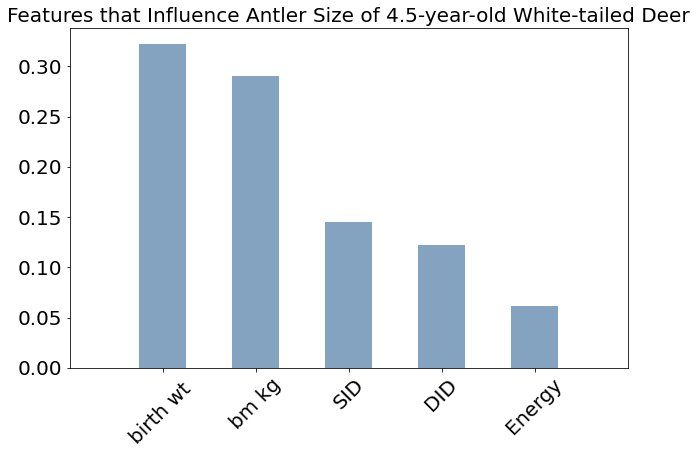

In [65]:
feature_names_a = [col for col in X_train_a]
feature_importances_a = gb_a.feature_importances_
indices_a = np.argsort(feature_importances_a)[::-1]
n = 5 # maximum feature importances displayed
idx_a = indices_a[0:n] 
std = np.std(gb_a.feature_importances_)

plt.figure(figsize=(10, 6.25))
titlefont = 20
plt.title("Features that Influence Antler Size of 4.5-year-old White-tailed Deer", fontdict={'fontsize':titlefont})
plt.bar(range(n), feature_importances_b[idx_b], color=(0.2, 0.4, 0.6, 0.6), width=0.5, align="center")
xticksize = 20
plt.xticks(range(n), [feature_names_b[id] for id in idx_b], rotation = 45, fontdict={'fontsize':xticksize}) 
plt.tick_params(axis='y', which='major', labelsize=20)
plt.xlim([-1, n]) 
plt.show()

In [31]:
feat_importances_b = pd.DataFrame(gb_b.feature_importances_, index=X_train_b.columns, columns=["Importance"])
feat_importances_b.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances_b

,Importance
birth wt,0.321918
bm kg,0.289987
SID,0.144697
DID,0.121892
Energy,0.061963
DaB,0.043156
Birthyr,0.009292
yr,0.005913
Lit type,0.001182


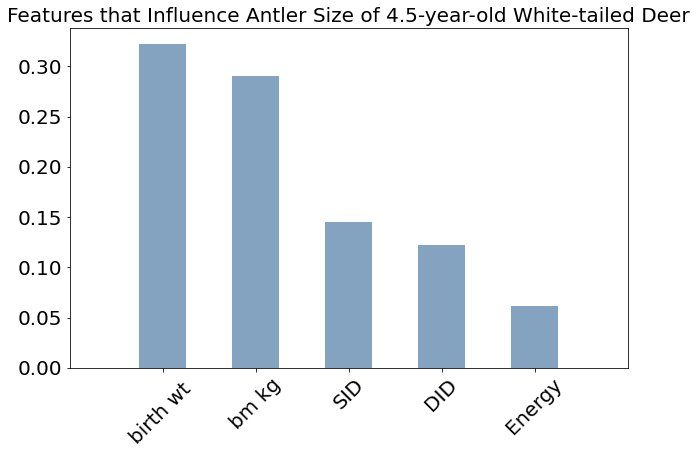

In [64]:
feature_names_b = [col for col in X_train_b]
feature_importances_b = gb_b.feature_importances_
indices_b = np.argsort(feature_importances_b)[::-1]
n = 5 # maximum feature importances displayed
idx_b = indices_b[0:n] 
std = np.std(gb_b.feature_importances_)

plt.figure(figsize=(10, 6.25))
titlefont = 20
plt.title("Features that Influence Antler Size of 4.5-year-old White-tailed Deer", fontdict={'fontsize':titlefont})
plt.bar(range(n), feature_importances_b[idx_b], color=(0.2, 0.4, 0.6, 0.6), width=0.5, align="center")
xticksize = 20
plt.xticks(range(n), [feature_names_b[id] for id in idx_b], rotation = 45, fontdict={'fontsize':xticksize}) 
plt.tick_params(axis='y', which='major', labelsize=20)
plt.xlim([-1, n]) 
plt.show()

### B. 5.5-year-olds

In [33]:
feat_importances = pd.DataFrame(gb.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances

,Importance
SID,0.297193
birth wt,0.266062
DID,0.184323
bm kg,0.149730
Energy,0.040173
Birthyr,0.034314
yr,0.028204


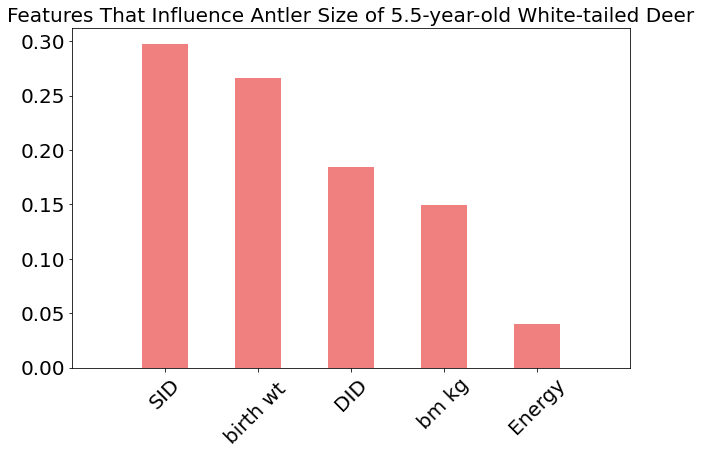

In [63]:
feature_names = [col for col in X_train]
feature_importances = gb.feature_importances_
indices = np.argsort(feature_importances)[::-1]
n = 5 # maximum feature importances displayed
idx = indices[0:n] 
std = np.std(gb.feature_importances_)

plt.figure(figsize=(10, 6.25))
titlefont = 20
plt.title("Features That Influence Antler Size of 5.5-year-old White-tailed Deer", fontdict={'fontsize':titlefont})
plt.bar(range(n), feature_importances[idx], color="lightcoral", width=0.5, align="center")
xticksize = 20
plt.xticks(range(n), [feature_names[id] for id in idx], rotation = 45, fontdict={'fontsize':xticksize}) 
plt.tick_params(axis='y', which='major', labelsize=20)
plt.xlim([-1, n]) 
plt.show()



In [35]:
feat_importances_1 = pd.DataFrame(gb_1.feature_importances_, index=X_train_1.columns, columns=["Importance"])
feat_importances_1.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances_1

,Importance
SID,0.307556
birth wt,0.254887
DID,0.168272
bm kg,0.159456
Birthyr,0.050000
Energy,0.040644
DaB,0.013003
yr,0.004656
Lit type,0.001526


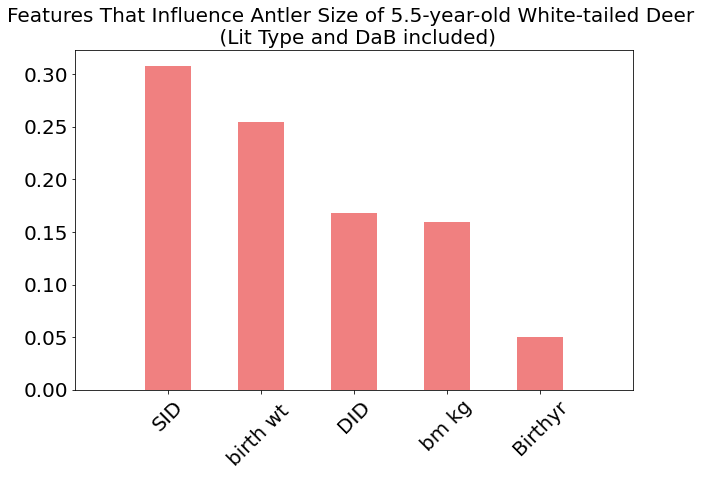

In [66]:
feature_names_1 = [col for col in X_train_1]
feature_importances_1 = gb_1.feature_importances_
indices_1 = np.argsort(feature_importances_1)[::-1]
n = 5 # maximum feature importances displayed
idx_1 = indices_1[0:n] 
std = np.std(gb_1.feature_importances_)

plt.figure(figsize=(10, 6.25))
titlefont = 20
plt.title("Features That Influence Antler Size of 5.5-year-old White-tailed Deer \n (Lit Type and DaB included)", fontdict={'fontsize':titlefont})
plt.bar(range(n), feature_importances_1[idx_1], color="lightcoral", width=0.5, align="center")
xticksize = 20
plt.xticks(range(n), [feature_names_1[id] for id in idx_1], rotation = 45, fontdict={'fontsize':xticksize}) 
plt.tick_params(axis='y', which='major', labelsize=20)
plt.xlim([-1, n]) 
plt.show()

## 7. Implications

### A. 4.5-year-olds
Antler size of 4.5 year-old males is most influenced by the birth weight of the male.  This is surprising that the birth weight of the male is predictive than the body mass of the individual male.  Interestingly, the effects from the father and mother are also influential, whether it be from their genetics, nutritional condition, or otherwise.  What's most surprising here is that, when it comes to determing antler size of mature males, it didn't really matter whether males had been eating a low or high energy diet throughout their life.  

###  B. 5.5-year-olds
Antler size of 5.5 year-old males is most influenced by the father (SID) followed by the birth weight of the male.

### C. Commonalities and differences
Birth weight of the male was the most influential predictor of 4.5 year olds and the second most influential of 5.5 year olds.  Also for both age groups, all Energy was less predictive than effects from birth weight, body mass, and effects frmo the mother and father (DID and SID). Interestingly, effects from the father are more apparent when individuals are 5.5 years old. 